### Explore data

In [1]:
from tqdm import tqdm
import numpy as np

##### FWD

In [57]:
root = 'data/'

for filename in os.listdir(root):
    with open(root + filename) as file:
        train = [line.rstrip('\n') for line in file]

    tr_total, tr_unique, max_len = 0, 0, 0
    all_lens = []
    for line in tqdm(train):
        splitted = line.split('|')
        number, examples = splitted[0], splitted[1]
        examples = examples.split('\t')
        for el in examples:
            len_now = len(el.split(' '))
            if len_now > max_len:
                max_len = len_now
            all_lens.append(len_now)

        tr_total += int(number)
        tr_unique += 1


    print('Total examples generated in ' + filename, f'{tr_total:,}')
    print('Unique examples fed to model in ' + filename, f'{tr_unique:,}')
    print('Max len in ' + filename, max_len)
    print('Mean len in ' + filename, np.mean(all_lens))
    print('-' * 100)

100%|██████████| 9986/9986 [00:00<00:00, 192828.69it/s]


Total examples generated in prim_fwd.valid 1,558,675
Unique examples fed to model in prim_fwd.valid 9,985
Max len in prim_fwd.valid 505
Mean len in prim_fwd.valid 36.8164747120681
----------------------------------------------------------------------------------------------------
Total examples generated in prim_fwd.test 1,237,312
Unique examples fed to model in prim_fwd.test 9,986
Max len in prim_fwd.test 506
Mean len in prim_fwd.test 36.28840376527138
----------------------------------------------------------------------------------------------------


100%|██████████| 45339899/45339899 [04:06<00:00, 184269.46it/s]


Total examples generated in prim_fwd.train 112,106,299
Unique examples fed to model in prim_fwd.train 45,339,899
Max len in prim_fwd.train 510
Mean len in prim_fwd.train 39.564734070362064
----------------------------------------------------------------------------------------------------


### Results and metrics

In [2]:
import seaborn as sns
sns.set()
import os

In [2]:
#runs_dict.pop('197594')
#runs_dict.pop('197612')
#runs_dict.pop('197593')
#runs_dict.pop('195850')
#runs_dict.pop('195286')
#runs_dict.pop('197641')

#runs_dict.pop('197641')   # BS 256
#runs_dict.pop('198206')   # BS 256 & lr=0.001
#runs_dict.pop('194321')   # seq rel 32
#runs_dict.pop('195287')   # seq rel 250 NUM-2',  --- сдвинут по времени
#runs_dict.pop('195286')   # pos emb NUM-2'       --- сдвинут по времени




names = {'188513':'emb',
         '194320':'pos emb',
         '194321':'seq rel att 32',
         '194322':'seq rel att 250',
         '194323':'pos emb + seq rel 32',
         '194324':'pos emb + seq rel 250',
         '195286':'pos emb NUM-2 Failed',
         '195287':'seq rel 250 NUM-2 Failed',
         '195850':'pos emb NUM-3',
         '195851':'seq rel 250 NUM-3',
         '197797':'1',
         '197641':'BS 256',
         '198206':'BS 256 & lr=0.001',
         '204657':'pos emb NUM-2',
         '204694':'seq rel 250 NUM-2',
         #'232394':'tree rel mult1 FULL',
         #'232478':'tree rel mult2 FULL',
         '232589':'tree rel mult2 2k',
         '232595':'tree rel mult2 2k + DECPOS',
         '232596':'tree rel mult1 2k',
         '236679':'tree rel mult2 10k + DECPOS',
         '261725':'tree pos enc w16',
         '261726':'tree pos enc w32',
         '262367':'tree pos enc w8',
         '262369':'tree pos enc w16 NO DECPOS',
         '262944':'tree pos enc w16 NUM-2',
         '263222':'tree pos enc w32 NUM-2',
         '264200':'tree pos enc w16 NUM-3',
         '266873':'tree pos enc ENC+DEC w16',
         '266969':'tree pos enc ENC+DEC w32',
         '267029':'tree pos enc ENC+DEC w8',
         '268762':'tree pos enc ENC+DEC w16 rerun',
         '268764':'tree pos enc ENC+DEC w16 NUM-2',
         '268765':'tree pos enc ENC+DEC w16 NUM-3',
         
         '239415':'pos emb 400ep',
         '269255':'pos emb 400ep NUM-2',
         '269256':'pos emb 400ep NUM-3',
         '238443':'seq rel att 250 400ep',
         '269257':'seq rel att 250 400ep NUM-2',
         '269258':'seq rel att 250 400ep NUM-3',
         '236678':'tree rel mult2 2k + DECPOS 400 ep',     
         
         '272202':'seq rel att 250 FULL',
         '272616':'seq rel att 250 FULL NUM-2',
         '272617':'seq rel att 250 FULL NUM-3'
        }

In [3]:
### EMB  
188513

### POS EMB  (pos_emb_0202/)
194320
204657
195850

### SEQ REL ATT 250 (ENC+DEC)  (seq_rel_att_0202/)
194322
204694
195851

### TREE REL ATT mult2 2k + DECPOS  (tree_rel_att_0303/)
236678

# ГОТОВЫ ПО 400 ЭПОХ
### TREE POS ENC w16 (+DECPOS)  (tree_pos_enc_1204/)
261725
262944
264200

# ГОТОВЫ ПО 400 ЭПОХ
### TREE POS ENC w32 (+DECPOS)  (tree_pos_enc_1204/)
261726
263222

### TREE POS ENC w16 (ENC+DEC) (tree_pos_enc_2004/)
266873
268762   # нули опять
268764
268765

### 400 ep дообучение
239415  # pos emb
269255
269256

238443  # seq rel 250
269257
269258

269258

In [5]:
root = '../dumped/'
chosen_runs = [
               '194320',
               '194322',
               '236678',
               '261725',
               '266873',
               '272202',
               '195851',
               '272616',
               '272617'
              ]


runs = []
for root_next in os.listdir(root):
    for filename in os.listdir(root+root_next):
        run_name = root + root_next + '/' + filename + '/train.log'
        if any(x in run_name for x in chosen_runs):
            runs.append(run_name)

In [6]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            if len(time) == 1:     # day num
                line_split = line.split()
                day, time = line_split[5], line_split[7]
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = int(day) * 24 + (time.hour * 60 + time.minute) / 60
            else:
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = (time.hour * 60 + time.minute) / 60
            #if time > 70:
            #    is_end=True
            #    break 
            
            whole_dict['time'].append(time)
            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])
    runs_dict[name.split('/')[3]] = whole_dict

Количество эпох каждой модели:

In [7]:
for key_1 in runs_dict.keys():
    for key_2 in runs_dict[key_1].keys():
        print(key_1, '\t', len(runs_dict[key_1][key_2]), '\t', names[key_1])
        break

194320 	 362 	 pos emb
261725 	 400 	 tree pos enc w16
194322 	 253 	 seq rel att 250
272616 	 287 	 seq rel att 250 FULL NUM-2
272617 	 322 	 seq rel att 250 FULL NUM-3
272202 	 400 	 seq rel att 250 FULL
195851 	 383 	 seq rel 250 NUM-3
266873 	 258 	 tree pos enc ENC+DEC w16
236678 	 399 	 tree rel mult2 2k + DECPOS 400 ep


Если надо, то режем все по 275:

In [31]:
#for key_1 in runs_dict.keys():
#    for key_2 in runs_dict[key_1].keys():
#        runs_dict[key_1][key_2] = runs_dict[key_1][key_2][:275]

### GROUPED

In [26]:
def return_grouped_df(runs_dict, runs_nums):
    new_dict = {}
    for run in runs_nums:
        for key in runs_dict[run].keys():
            if key in new_dict.keys():
                new_dict[key].extend(runs_dict[run][key])
            else:
                new_dict[key] = runs_dict[run][key]
    
    return pd.DataFrame(new_dict)

In [21]:
import pandas as pd

pos_emb_runs = ['194320', '204657', '195850']
pos_emb_df = return_grouped_df(runs_dict, pos_emb_runs)

seq_rel_att_runs = ['194322', '204694', '195851']
seq_rel_att_df = return_grouped_df(runs_dict, seq_rel_att_runs)

In [22]:
needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']

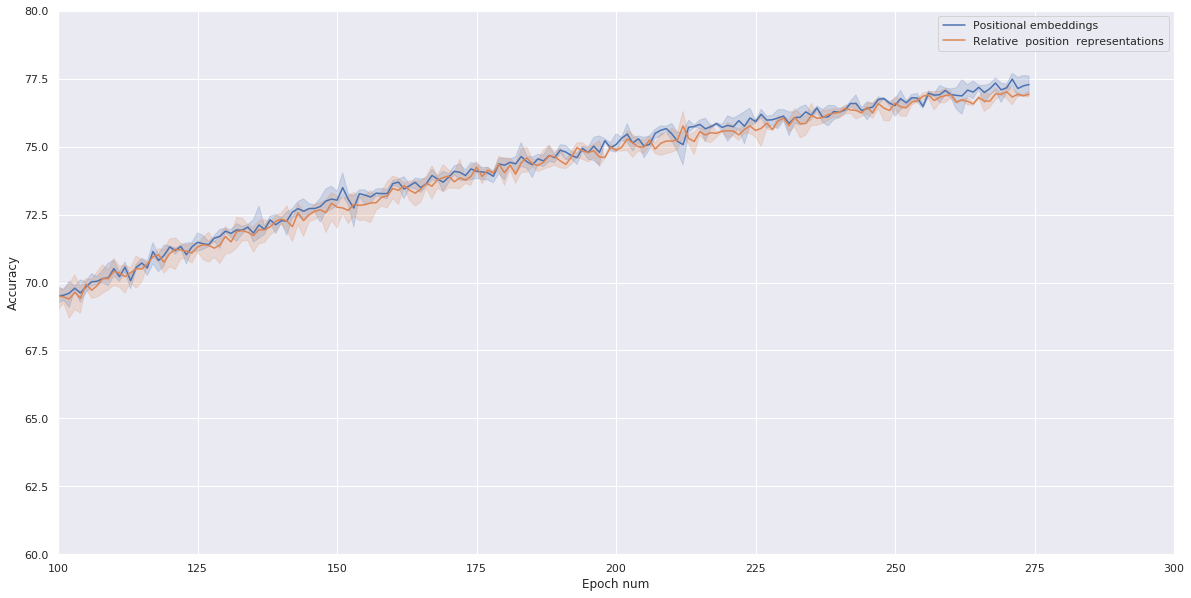

KeyboardInterrupt: 

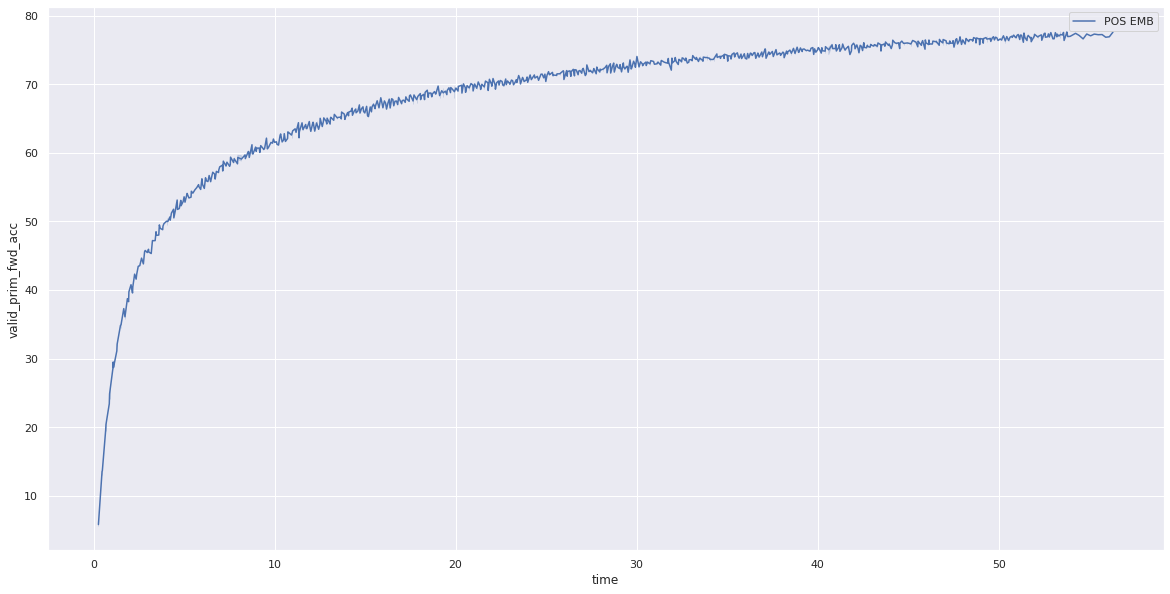

In [27]:
import matplotlib.pyplot as plt

for key in needed:
    ### epoch
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='epoch', y=key, label='Positional embeddings')
    sns.lineplot(data=seq_rel_att_df, x='epoch', y=key, label='Relative  position  representations')
    # accuracy limits 
    plt.xlim(100, 300)
    plt.ylim(60, 80)
    #plt.title('Validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch num')
    
    plt.legend()
    plt.show()
    
    ### time
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='time', y=key, label='POS EMB')
    sns.lineplot(data=seq_rel_att_df, x='time', y=key, label='SEQ REL ATT 250 encoder')
    plt.title(key)
    plt.legend()
    plt.show()

### USUAL

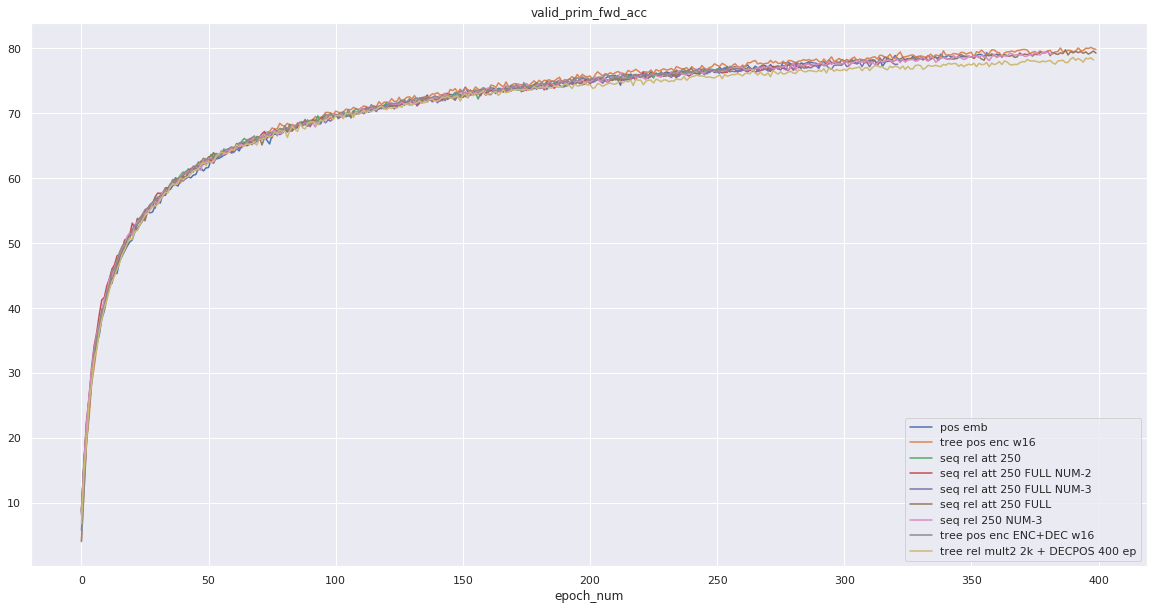

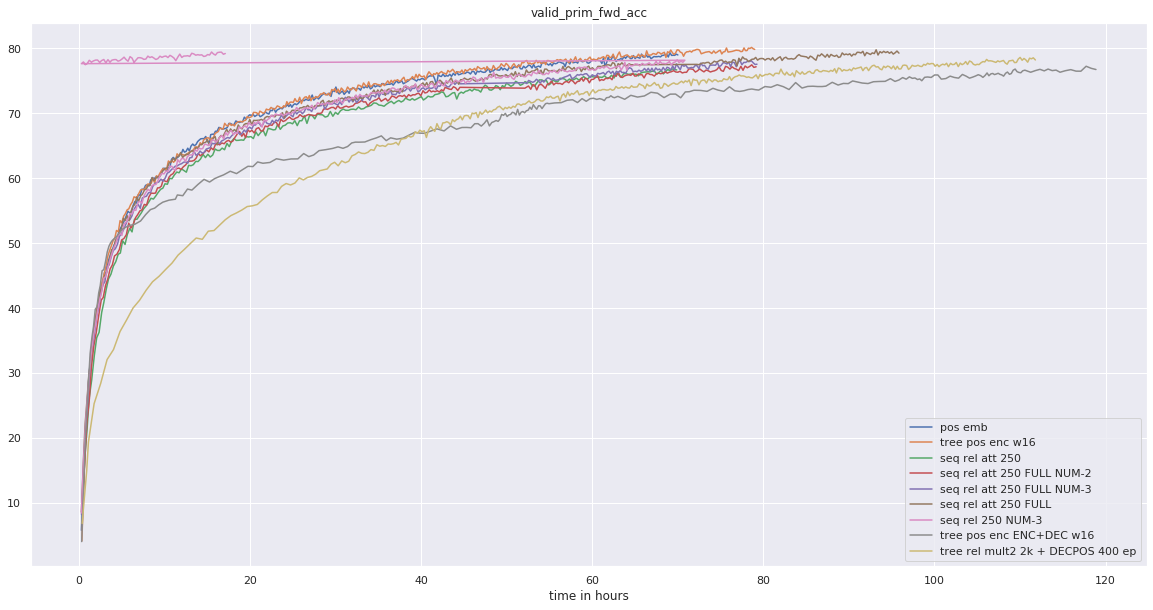

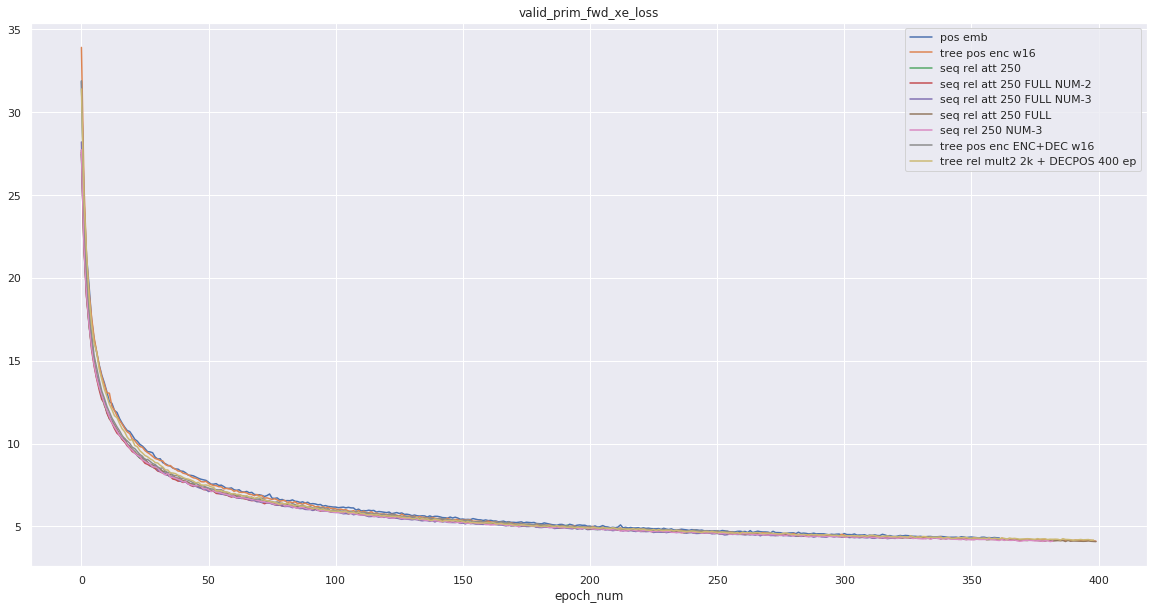

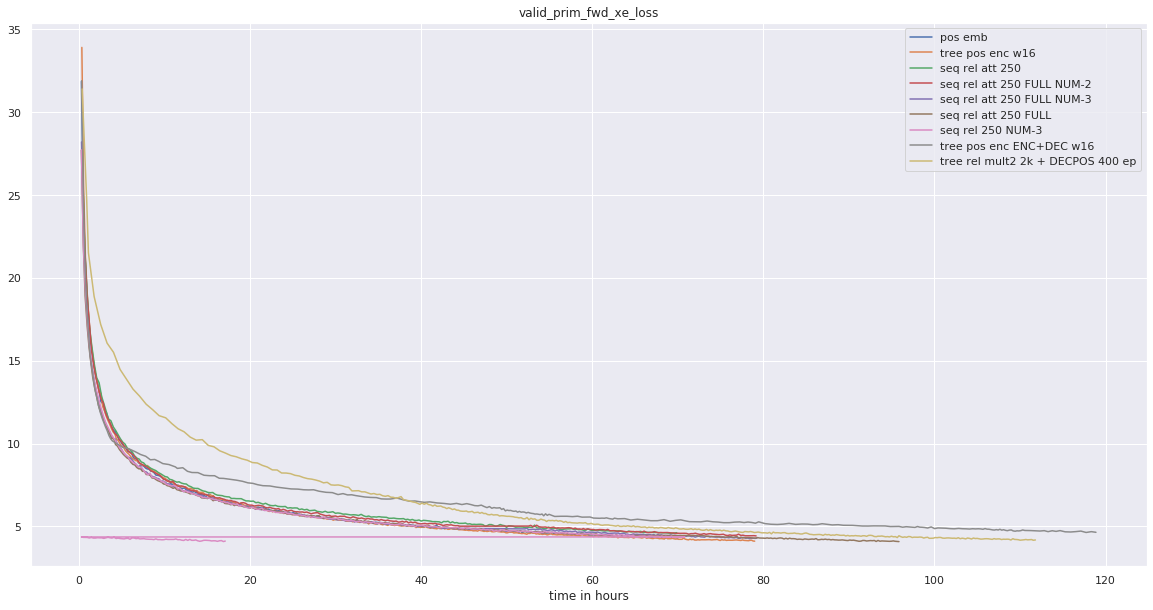

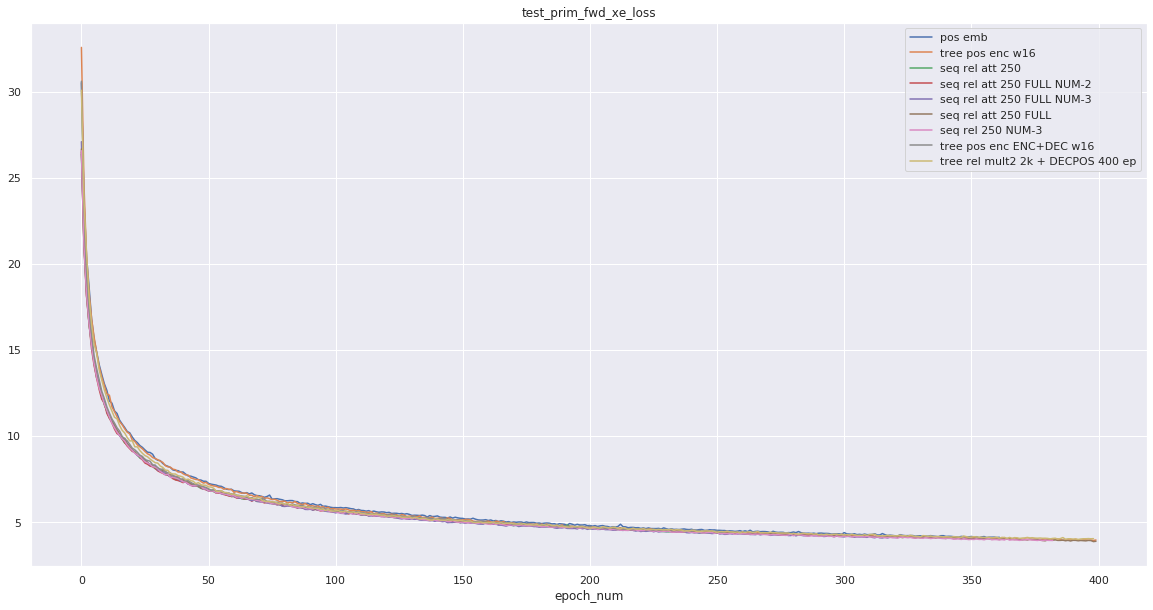

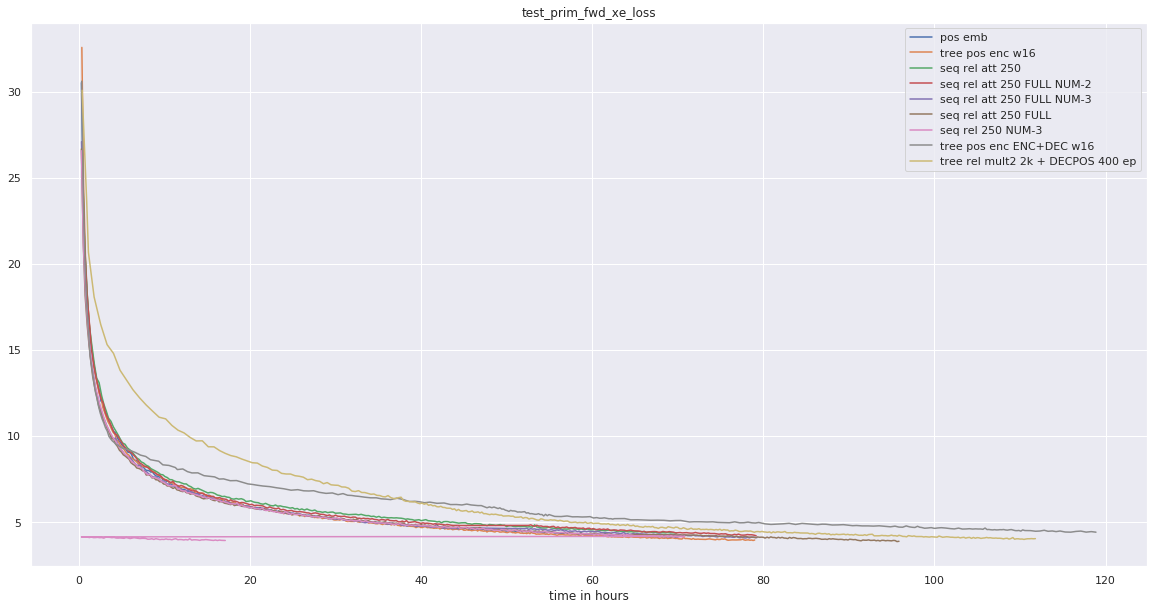

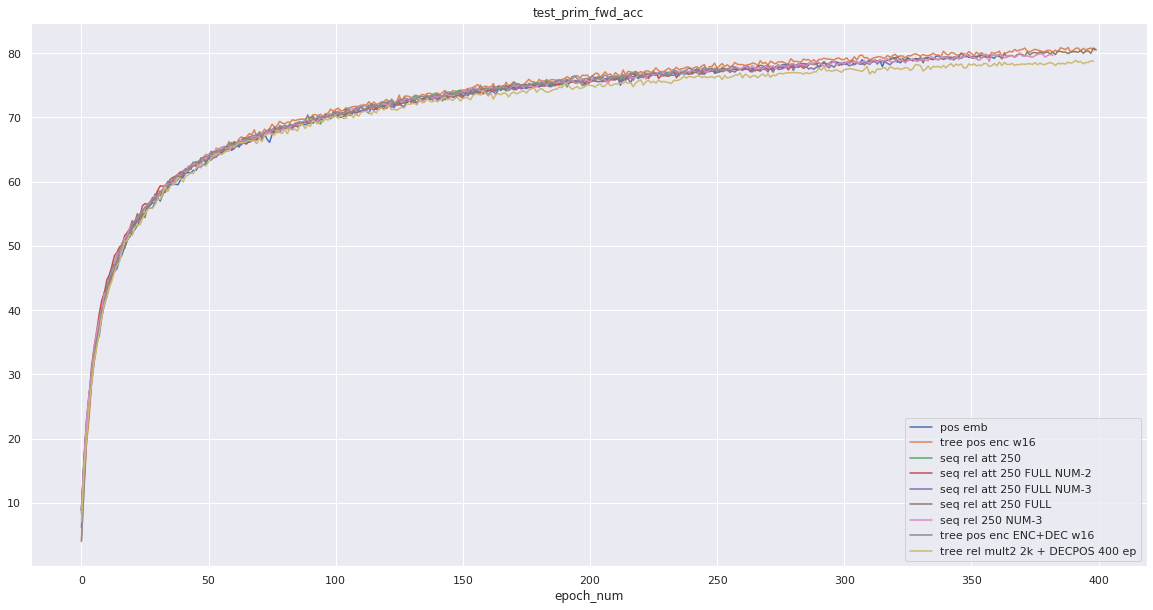

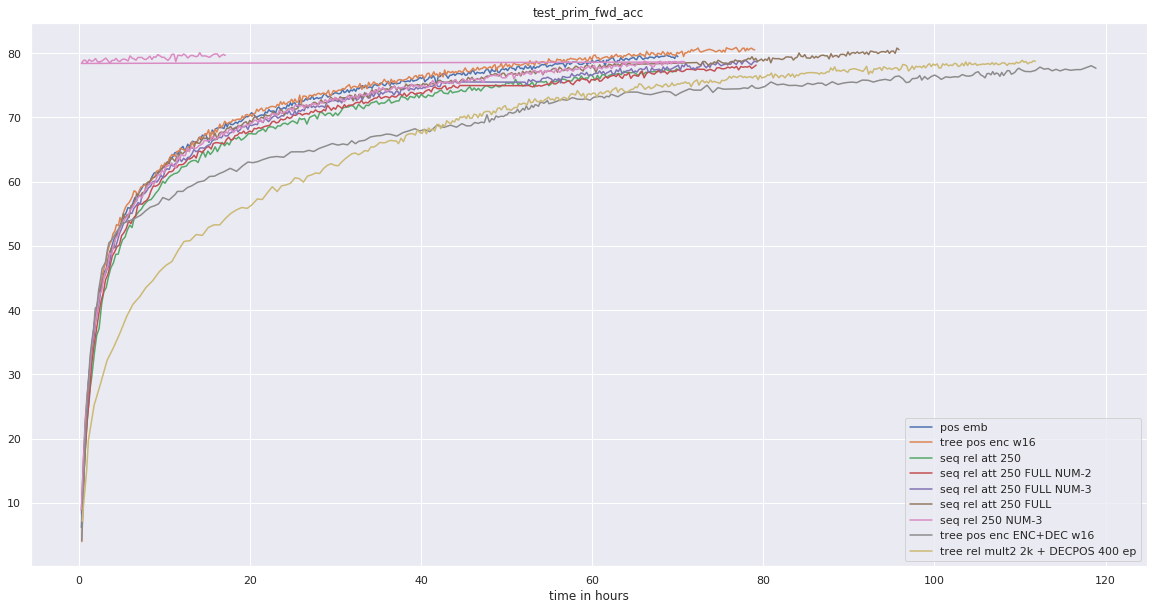

In [8]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']
for key in needed:
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['epoch'],
            runs_dict[run][key], 
            label=names[run]
        )
        #plt.xlim(200, 300)
        #plt.ylim(70, 80)
        plt.xlabel('epoch_num')
        plt.title(key)
        plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['time'],
            runs_dict[run][key],
            label=names[run]
        )
        plt.xlabel('time in hours')
        plt.title(key)
        plt.legend()
            
    plt.show()

In [1]:
'''import datetime
import json

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            time = datetime.datetime.strptime(time, '%H:%M:%S')
            time = (time.hour * 60 + time.minute) / 60
            whole_dict['time'].append(time)

            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])   
    runs_dict[name.split('/')[2]] = whole_dict'''

"import datetime\nimport json\n\nruns_dict = {}\n\nfor name in runs:\n    file = open(name)\n    lines = [line.rstrip('\n') for line in file]\n    whole_dict = {'time':[]}\n    for line in lines:\n        if '__log__' in line:\n            time = line.split()[5]\n            time = datetime.datetime.strptime(time, '%H:%M:%S')\n            time = (time.hour * 60 + time.minute) / 60\n            whole_dict['time'].append(time)\n\n            json_line = json.loads(line[line.find('{'):])\n            for key in json_line:\n                if key not in whole_dict:\n                    whole_dict[key] = []\n                whole_dict[key].append(json_line[key])   \n    runs_dict[name.split('/')[2]] = whole_dict"

In [2]:
'''import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']
for key in whole_dict:
    for run in runs_dict.keys():
        if key in needed:
            print(key, runs_dict[run][key])'''

"import matplotlib.pyplot as plt\n\n\nneeded = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']\nfor key in whole_dict:\n    for run in runs_dict.keys():\n        if key in needed:\n            print(key, runs_dict[run][key])"

### working with beam search evaluation

In [17]:
names = {'241786':'pos emb 400ep',
         '272605':'pos emb 400ep NUM-2',
         '272606':'pos emb 400ep NUM-3',
         '241787':'seq rel att 250 400ep',
         '271718':'seq rel att 250 400ep NUM-2',
         '271719':'seq rel att 250 400ep NUM-3',
         '257866':'tree rel att 2k DECPOS 400ep',
         
         '271832':'tree pos enc w16 400ep',
         '271833':'tree pos enc w16 400ep NUM-2',
         '271834':'tree pos enc w16 400ep NUM-3', 
         '271830':'tree pos enc w32 400ep',
         '271831':'tree pos enc w32 400ep NUM-2',
         
         
         '261091':'pos emb 400ep nodups ',               # check 400 ep
         '271820':'pos emb 400ep NUM-2 nodups',
         '272604':'pos emb 400ep NUM-3 nodups',
         '261092':'seq rel att 250 400ep nodups ',       # check 400 ep
         '271717':'seq rel att 250 400ep NUM-2 nodups',
         '271716':'seq rel att 250 400ep NUM-3 nodups',
         '261093':'tree rel att 2k DECPOS 400ep nodups',  # check 400 ep
         '271822':'tree pos enc w16 400ep nodups',
         '271823':'tree pos enc w16 400ep NUM-2 nodups',
         '271824':'tree pos enc w16 400ep NUM-3 nodups',
         '271829':'tree pos enc w32 400ep nodups',
         '271828':'tree pos enc w32 400ep NUM-2 nodups',
         '274965':'tree pos enc w16 ENC+DEC 400ep nodups',
         '274966':'tree pos enc w16 ENC+DEC 400ep NUM-2 nodups',
         '274967':'tree pos enc w16 ENC+DEC 400ep NUM-3 nodups',
         
        }

In [18]:
import os

root = '../dumped/'
chosen_runs = list(names.keys())


runs = []
for root_next in os.listdir(root):
    for filename in os.listdir(root+root_next):
        run_name = root + root_next + '/' + filename + '/train.log'
        if any(x in run_name for x in chosen_runs):
            runs.append(run_name)
            print(run_name)

../dumped/eval_seq_rel_att_nodups/271717/train.log
../dumped/eval_seq_rel_att_nodups/271716/train.log
../dumped/eval_seq_rel_att_nodups/261092/train.log
../dumped/eval_tree_pos_enc_nodups/271829/train.log
../dumped/eval_tree_pos_enc_nodups/271823/train.log
../dumped/eval_tree_pos_enc_nodups/271828/train.log
../dumped/eval_tree_pos_enc_nodups/271824/train.log
../dumped/eval_tree_pos_enc_nodups/271822/train.log
../dumped/eval_tree_pos_enc/271832/train.log
../dumped/eval_tree_pos_enc/271833/train.log
../dumped/eval_tree_pos_enc/271834/train.log
../dumped/eval_tree_pos_enc/271831/train.log
../dumped/eval_tree_pos_enc/271830/train.log
../dumped/eval_tree_rel_att/257866/train.log
../dumped/eval_tree_pos_enc_2004_nodups/273342/train.log
../dumped/eval_tree_pos_enc_2004_nodups/273350/train.log
../dumped/eval_pos_emb_nodups/271820/train.log
../dumped/eval_pos_emb_nodups/272604/train.log
../dumped/eval_pos_emb_nodups/261091/train.log
../dumped/eval_tree_pos_enc_2004/273326/train.log
../dumped/ev

In [19]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    all_eval_acc = []
    for line in lines:
        if 'equations were evaluated correctly.' in line:
            solved, total = line.split()[7].split('/')
            accuracy = int(solved)/int(total)
            print(names[name.split('/')[-2]], accuracy)
            all_eval_acc.append(accuracy)  
                
    runs_dict[name.split('/')[3]] = all_eval_acc

seq rel att 250 400ep NUM-2 nodups 0.7968204730515703
seq rel att 250 400ep NUM-2 nodups 0.7982422127439576
seq rel att 250 400ep NUM-3 nodups 0.7886777820860799
seq rel att 250 400ep NUM-3 nodups 0.7907457670931886
seq rel att 250 400ep nodups  0.8013441902546207
seq rel att 250 400ep nodups  0.8022489336952308
tree pos enc w32 400ep nodups 0.7922967558485201
tree pos enc w32 400ep nodups 0.7941062427297402
tree pos enc w16 400ep NUM-2 nodups 0.7986299599327905
tree pos enc w16 400ep NUM-2 nodups 0.8005686958769549
tree pos enc w32 400ep NUM-2 nodups 0.7898410236525785
tree pos enc w32 400ep NUM-2 nodups 0.7924260049114644
tree pos enc w16 400ep NUM-3 nodups 0.7939769936667959
tree pos enc w16 400ep NUM-3 nodups 0.7956572314850717
tree pos enc w16 400ep nodups 0.8039291715135065
tree pos enc w16 400ep nodups 0.8071603980871138
tree pos enc w16 400ep 0.8784176264396595
tree pos enc w16 400ep 0.8828359703585019
tree pos enc w16 400ep NUM-2 0.8757135703555333
tree pos enc w16 400ep NUM-2

In [19]:
### print results in readable dataframe

import pandas as pd

res_df = pd.DataFrame(columns=['pos emb', 'seq rel att 250', 'tree rel att 2k (only in Encoder)', 
                              'tree pos enc w16 (only in Encoder)', 'tree pos enc w32 (only in Encoder)'])

for col in res_df.columns:
    res_df.loc['400 ep', col] = []

for col in res_df.columns:
    res_df.loc['400 ep + nodups', col] = []    
    
for run in runs_dict:
    acc = runs_dict[run]
    
    if 'pos emb' in names[run]:
        col = 'pos emb'
    elif 'seq rel att 250' in names[run]:
        col = 'seq rel att 250'
    elif 'tree rel att' in names[run]:
        col = 'tree rel att 2k (only in Encoder)'
    elif 'tree pos enc w32' in names[run]:
        col = 'tree pos enc w32 (only in Encoder)'
    elif 'tree pos enc w16' in names[run]:
        col = 'tree pos enc w16 (only in Encoder)'
    
    if '400ep' in names[run] and 'nodups' in names[run]:
        row = '400 ep + nodups'
    elif '400ep' in names[run]:
        row = '400 ep'
    else:
        continue
    
    for i in range(len(acc)):
        acc[i] = round(acc[i], 4)
    res_df.loc[row, col] += acc
       

for el in res_df.iterrows():
    for i, value in enumerate(el[1]):
        res_df.loc[el[0], res_df.columns[i]] = str(round(np.mean(value), 4)) + ' +- ' + str(round(np.std(value), 4))
        
res_df

,pos emb,seq rel att 250,tree rel att 2k (only in Encoder),tree pos enc w16 (only in Encoder),tree pos enc w32 (only in Encoder)
400 ep,0.8769 +- 0.0033,0.875 +- 0.0033,0.8744 +- 0.0018,0.8766 +- 0.0042,0.8722 +- 0.0038
400 ep + nodups,0.8013 +- 0.0037,0.7963 +- 0.005,0.7982 +- 0.0006,0.8 +- 0.0045,0.7921 +- 0.0015


### beam search w 10; accuracy